In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Zad
Na danych datasets wykonaj wykonaj LinearRegression w następujących krokach:

* podział na train test
* wykonaj skalowanie
* wykonaj PCA i wyznacz optymalną ilość komponentów
* naucz model
    * Naucz model na wszystkich współrzędnych 
    * Naucz model na zredukowanej ilości współrzędnych
    * porównaj wyniki


In [5]:
boston = datasets.load_boston()
# print(description)
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
X = boston.data
y = boston.target
print(X.shape)

(506, 13)


In [7]:
# train test robimy na surowych danych
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
from sklearn import model_selection

seed=123
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [9]:
# preprocessing using 0-1 scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
from sklearn import metrics
# obliczenia na wyniku przeskalowanym
print("Wyskalowany zestaw danych -> R2: {:.2f}".format(metrics.r2_score(y_pred = lr.predict(X_test_scaled), y_true = y_test)))

Wyskalowany zestaw danych -> R2: 0.70


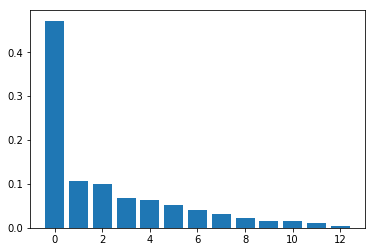

In [26]:
pca = PCA()
pca.fit(X_train_scaled)
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
plt.show()

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)
lr = LinearRegression()
# learning an LR on the scaled training data
lr.fit(X_train_scaled_pca, y_train)# scoring on the scaled test set
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = lr.predict(X_test_scaled_pca),y_true = y_test)) )

Scaled test set R2: 0.61


# Zad

Wykonaj powyższe zadanie z wykorzystaniem 

```python 
from sklearn.pipeline import Pipeline
```

In [21]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=3)),
    ("LR", LinearRegression())
])

In [22]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [24]:
print("Scaled test set R2: {:.2f}".format( metrics.r2_score( y_pred = pipe.predict(X_test),y_true = y_test)) )
# dostalismy prawie taki sam wynik jak ręcznie, bez pipeline - wczesniej 0.70, teraz 0.61

Scaled test set R2: 0.61


# Zad

Narysuj zależność ilości wymiarów i miary R2.

1
2
3
4
5
6
7
8
9
10
11
12


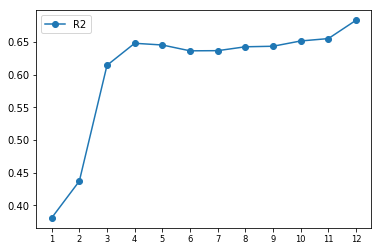

In [31]:
r2_array = []
for i in range(1,X.shape[1]):
    print(i)
    pipe = Pipeline([
        ("scaler", StandardScaler()), 
        ("pca", PCA(n_components=i)),
        ("LR", LinearRegression())    
    ])
    pipe.fit(X_train, y_train)
    # scoring on the scaled test set
    r2_array.append( metrics.r2_score( y_pred = pipe.predict(X_test),y_true = y_test)) 

t=range(1,X.shape[1])

plt.plot(r2_array, "o-", label="R2")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad
Wykonaj GridSearch po ilości komponentów do której redukujesz wymiar do redukcji.
Sprawdź
```python
n_components = [2,3,4,5,6,7,8,9,10]
```

In [27]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=3)),
    ("LR", LinearRegression())
])

param_grid = {'scaler':[StandardScaler(), None],
             'pca__n_components': np.arange(1,7)}

In [29]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=kfold)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('LR', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'scaler': [StandardScaler(copy=True, with_mean=True, with_std=True), None], 'pca__n_components': array([1, 2, 3, 4, 5, 6])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
print("Best parameters: ", grid.best_params_)
print("Test R2: {:.2f}".format( metrics.r2_score( y_pred= grid.predict(X_test), y_true= y_test)))

Best parameters:  {'pca__n_components': 6, 'scaler': StandardScaler(copy=True, with_mean=True, with_std=True)}
Test R2: 0.64
